In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

## Import Panda Dataframes from csv-Files (Excel Sheets)

In [106]:
path1 = 'database1.csv'
path2 = 'database2.csv'
path3 = 'database3.csv'

df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)
df3 = pd.read_csv(path3)

# Replace NaN in cells with emptry string in all dataframes
# df1.fillna('', inplace=True)
# df2.fillna('', inplace=True)
# df3.fillna('', inplace=True)


<class 'int'>


## Check Dataframe Headers to verify correct csv-Files and import to Dataframe

In [101]:
# To show all columns
pd.set_option('display.max_columns', None)

print("DataFrame from database1.csv:\n")
print(df1.head(10))

print("\nDataFrame from database2.csv:\n")
print(df2.head(10))

print("\nDataFrame from database3.csv:\n")
print(df3.head(10))


DataFrame from database1.csv:

                                 BETRIEB_NAME      BETRIEB_STRASSE  \
0                            technocycle GmbH     Industriestrasse   
1                    Lars Walch GmbH & Co. KG     Raiffeisenstraße   
2         Lars Walch GmbH & Co. GmbH & Co. KG    Raiffeisenstraße    
3                    Lars Walch GmbH & Co. KG     Raiffeisenstraße   
4                    Lars Walch GmbH & Co. KG    Raiffeisenstraße    
5          FSD Lwerk Berlin Brandenburg gGmbH       Kamenzer Damm    
6  HKV Elektroschrott Recycling GmbH & Co. KG        Gutenbergstr.   
7                     Hausgeräte Lagerverkauf         Wenger Höfe    
8            BRAL Reststoff-Bearbeitungs GmbH    Marzahner Straße    
9          Weinand Recyclingges. mbH & Co. KG  Schwabenheimer Weg    

  BETRIEB_HAUSNR BETRIEB_PLZ    BETRIEB_ORT   BETRIEB_BUNDESLAND  \
0             60       49565       Bramsche        Niedersachsen   
1             24       91460     Baudenbach               Baye

                                 BETRIEB_NAME      BETRIEB_STRASSE  \
0                            technocycle GmbH     Industriestrasse   
1                    Lars Walch GmbH & Co. KG     Raiffeisenstraße   
2         Lars Walch GmbH & Co. GmbH & Co. KG    Raiffeisenstraße    
3                    Lars Walch GmbH & Co. KG     Raiffeisenstraße   
4                    Lars Walch GmbH & Co. KG    Raiffeisenstraße    
5          FSD Lwerk Berlin Brandenburg gGmbH       Kamenzer Damm    
6  HKV Elektroschrott Recycling GmbH & Co. KG        Gutenbergstr.   
7                     Hausgeräte Lagerverkauf         Wenger Höfe    
8            BRAL Reststoff-Bearbeitungs GmbH    Marzahner Straße    
9          Weinand Recyclingges. mbH & Co. KG  Schwabenheimer Weg    

  BETRIEB_HAUSNR BETRIEB_PLZ    BETRIEB_ORT   BETRIEB_BUNDESLAND  \
0             60       49565       Bramsche        Niedersachsen   
1             24       91460     Baudenbach               Bayern   
2             24       91

In [102]:
relevant_columns = ["BETRIEB_NAME","BETRIEBSZERTIFIZIERUNG","KG1_INPUT"]
cat1_df = df1[relevant_columns]
cat1_df = cat1_df.dropna(subset=['BETRIEBSZERTIFIZIERUNG'])
cat1_df = cat1_df.dropna(subset=['KG1_INPUT'])
print(cat1_df.shape[0])

29


In [121]:
summed_df = cat1_df.groupby(['BETRIEB_NAME'])['KG1_INPUT'].sum().reset_index()
sorted_df = summed_df.sort_values(by='KG1_INPUT', ascending=False)
total_kg1_input = sorted_df['KG1_INPUT'].sum()
sorted_df['Cumulative_Sum'] = sorted_df['KG1_INPUT'].cumsum()
sorted_df['Cumulative_Percentage'] = (sorted_df['Cumulative_Sum'] / total_kg1_input) * 100
sorted_df = sorted_df.reset_index()
selected_df = sorted_df[sorted_df['Cumulative_Percentage'] <= 80]
selected_companies = selected_df['BETRIEB_NAME']
print(sorted_df.head(30))

# Number of the first n companies that make up more than 80 percent of total input for Kategorie 1 (CAUTION: starting from 0, so the actual number is index + 1)
index_80_percent = (sorted_df['Cumulative_Percentage'] > 80).idxmax()

# Get the exac percentage the first n companies make up over 80%
cumulative_percentage_value = sorted_df.loc[index_80_percent, 'Cumulative_Percentage']

relevant_companies = sorted_df.loc[:index_80_percent, 'BETRIEB_NAME'].tolist()

string_companies = ', '.join(str(item) for item in relevant_companies)



    index                                       BETRIEB_NAME  KG1_INPUT  \
0      13                     REMONDIS Electrorecycling GmbH    44012.0   
1      14                                       Rekular GmbH    31695.0   
2       3  Enviprotect Kühl- und Elektrogeräterecycling GmbH    23424.0   
3      16                  Riwald Electronics Recycling GmbH    15648.0   
4      12                                            NOEX AG     9200.0   
5       8                                 L+N Recycling GmbH     3791.0   
6      21                     Veolia Umweltservice Nord GmbH     3525.0   
7      22                       Wertstoffzentrum Dessau GmbH     1116.0   
8       0                   BRAL Reststoff-Bearbeitungs GmbH      863.0   
9      17      Rohstoffhandel Bernhard Westarp GmbH & Co. KG      727.0   
10      2                                Electrocycling GmbH      455.0   
11     20                                   Udo Achtert GmbH      143.0   
12     18                

## Show Kategorie 1 Input for companies graphically 

C:\Users\Felix Medicus\AppData\Local\Temp\ipykernel_24064\1166225409.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
C:\Users\Felix Medicus\AppData\Local\Temp\ipykernel_24064\1166225409.py:21: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


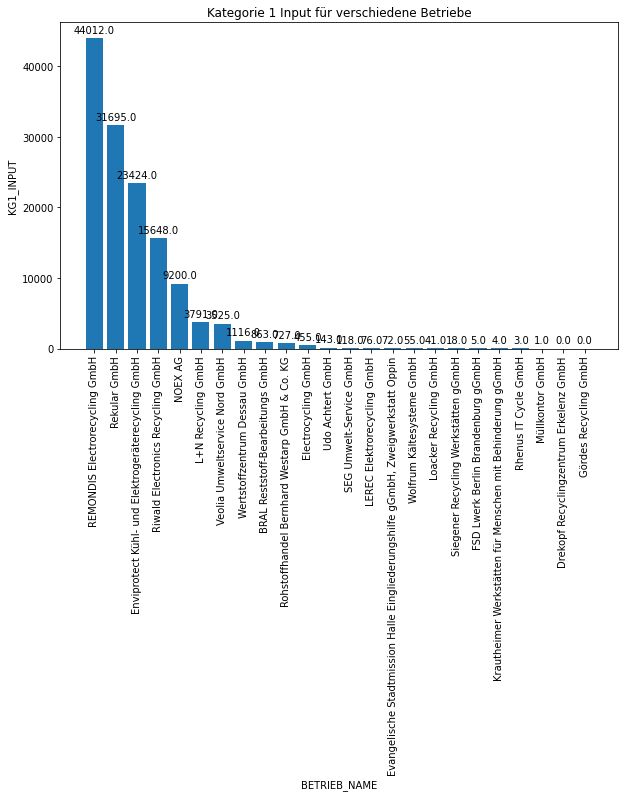


Total Kategorie 1 Input: 134992.0

The first 4 companies make up 85.03% of the total Input of Kategorie 1

These companies are REMONDIS Electrorecycling GmbH, Rekular GmbH, Enviprotect Kühl- und Elektrogeräterecycling GmbH, Riwald Electronics Recycling GmbH


In [123]:
plt.figure(figsize=(10, 6))
# plt.bar(sorted_df['BETRIEB_NAME'], sorted_df['KG1_INPUT'])
bars = plt.bar(sorted_df['BETRIEB_NAME'], sorted_df['KG1_INPUT'])
plt.xlabel('BETRIEB_NAME')
plt.ylabel('KG1_INPUT')
plt.title('Kategorie 1 Input für verschiedene Betriebe')
plt.xticks(rotation=90)
plt.tight_layout()





for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom')
        
plt.tight_layout()
plt.show()


print("\nTotal Kategorie 1 Input: {}".format(total_kg1_input))
print("\nThe first {} companies make up {}% of the total Input of Kategorie 1".format(index_80_percent + 1, "{:.2f}".format(cumulative_percentage_value)))
print("\nThese companies are", string_companies)